# BlueQubit hackathon

In [2]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile



In [134]:
import qiskit.qasm2
 
q = qiskit.qasm2.load("circuit_2_42q.qasm")

In [177]:
q.draw('mpl')

In [136]:
#search for measurement order
gate_count = 0
measurement_list = []
for gate in q.data:
    gg = gate[0]
    bb = gate[1]
    if gg.name == 'measure':
        measurement_list.append(bb[0]._index)


print(measurement_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


Total number of gates: 3155

Measurement order: 33 24 23 7 

In [137]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
q_num = 33
gate_count = 0
gate_num = 0
gate_position = []
double_qubit_gates_number = []
for gate in q.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 == q_num or q2 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
            double_qubit_gates_number.append(gate_count - 1)
    gate_num = gate_num + 1

print(gate_count)
print(gate_position)
print(double_qubit_gates_number)

41
[1097, 1098, 1099, 1100, 1101, 1102, 1127, 1134, 1135, 1136, 1137, 1138, 1193, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1263, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1292, 1298, 1299, 1300, 1301, 1302, 1303, 2905, 2906, 2907, 2908, 2909, 3146]
[6, 12, 20, 28]


In [138]:
q.data[1293]

CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.09378998020466019]), qubits=(Qubit(QuantumRegister(42, 'q'), 22),), clbits=())

In [139]:
last_double_gate_position = gate_position[double_qubit_gates_number[len(double_qubit_gates_number)-1]]
print(last_double_gate_position)
last_double_gate_poistion_for_qubit = double_qubit_gates_number[len(double_qubit_gates_number)-1]
print(last_double_gate_poistion_for_qubit)

1292
28


In [140]:
counter = 0
for i in range(last_double_gate_poistion_for_qubit + 1, gate_count):
    main_circ_gate_num = gate_position[i]
    #print(main_circ_gate_num)
    insert_position = last_double_gate_position + 1 + counter
    counter = counter + 1
    #print(insert_position)
    inst = q.data[main_circ_gate_num]
    del q.data[main_circ_gate_num]
    q.data.insert(insert_position, inst)

In [141]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
q_num = 33
gate_count = 0
gate_num = 0
gate_position = []
double_qubit_gates_number = []
for gate in q.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 == q_num or q2 == q_num:
            gate_count = gate_count + 1
            gate_position.append(gate_num)
            double_qubit_gates_number.append(gate_count - 1)
    gate_num = gate_num + 1

print(gate_count)
print(gate_position)
print(double_qubit_gates_number)

41
[1097, 1098, 1099, 1100, 1101, 1102, 1127, 1134, 1135, 1136, 1137, 1138, 1193, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1263, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304]
[6, 12, 20, 28]


In [142]:
q.data[1304]

CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(Qubit(QuantumRegister(42, 'q'), 33),), clbits=(Clbit(ClassicalRegister(42, 'c'), 33),))

In [143]:
gate_position[len(gate_position)-1]

1304

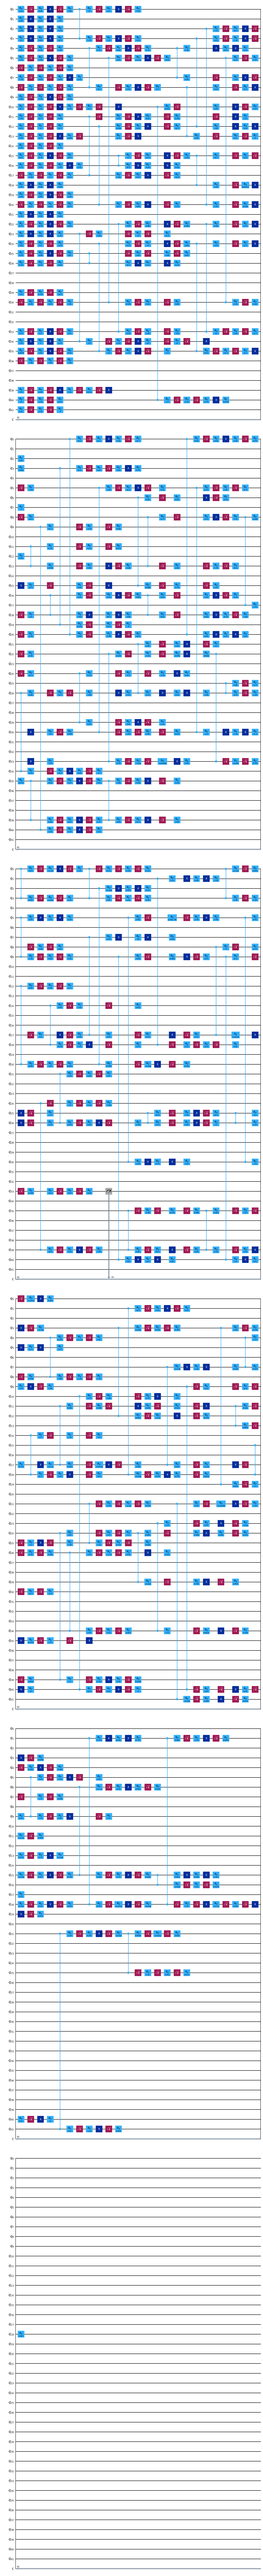

In [144]:
new_qc = QuantumCircuit(42,42)
gate_num = 0
for i in range(gate_position[len(gate_position)-1]+1):
    new_qc.append(q.data[i], new_qc.qubits, new_qc.clbits)
new_qc.draw('mpl')    

In [146]:
# Python3 program to check if there is exist a path between
# two vertices of an undirected graph.
from collections import deque
def addEdge(v, w):
    global adj
    adj[v].append(w)
    adj[w].append(v)
 
# A BFS based function to check whether d is reachable from s.
def isReachable(s, d):
     
    # Base case
    if (s == d):
        return True
 
    # Mark all the vertices as not visited
    visited = [False for i in range(V)]
 
    # Create a queue for BFS
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited[s] = True
    queue.append(s)
 
    while (len(queue) > 0):
       
        # Dequeue a vertex from queue and print
        s = queue.popleft()
        # queue.pop_front()
 
        # Get all adjacent vertices of the dequeued vertex s
        # If a adjacent has not been visited, then mark it
        # visited  and enqueue it
        for i in adj[s]:
 
            # If this adjacent node is the destination node,
            # then return true
            if (i == d):
                return True
 
            # Else, continue to do BFS
            if (not visited[i]):
                visited[i] = True
                queue.append(i)
    # If BFS is complete without visiting d
    return False
 


In [148]:
V = 42
adj = [[] for i in range(V+1)]
for gate in new_qc.data:
     #print('\ngate name:', gate[0].name)
     bb = gate[1]
     #print('qubit(s) acted on:', bb[0]._index)
     if len(bb) > 1:
        #print('qubit(s) acted on:', bb[1]._index)
        addEdge(bb[0]._index, bb[1]._index)

for i in range(42):
    addEdge(i, i)

list_of_conn = []
q_n = 33
for u in range(q_n,q_n+1):
    for v in range(1,42):
        if (isReachable(u, v)):
            print("There is a path from",u,"to",v)
            list_of_conn.append(u)
            list_of_conn.append(v)
        else:
            aa = 1
            #print("There is no path from",u,"to",v)
list_of_conn = list(set(list_of_conn))
print(list_of_conn)
print(len(list_of_conn))

There is a path from 33 to 22
There is a path from 33 to 33
[33, 22]
2


In [156]:
if 23 in q_num_list:
    print('1')

In [174]:
def count_gates(qc: QuantumCircuit):
    gate_count = {qubit: 0 for qubit in qc.qubits}
    for gate in qc.data:
        for qubit in gate.qubits:
            gate_count[qubit] += 1
    return gate_count

def remove_unused_wires(qc: QuantumCircuit):
    gate_count = count_gates(qc)
    for qubit, count in gate_count.items():
        if count == 0:
            qc.qubits.remove(qubit)
    return qc

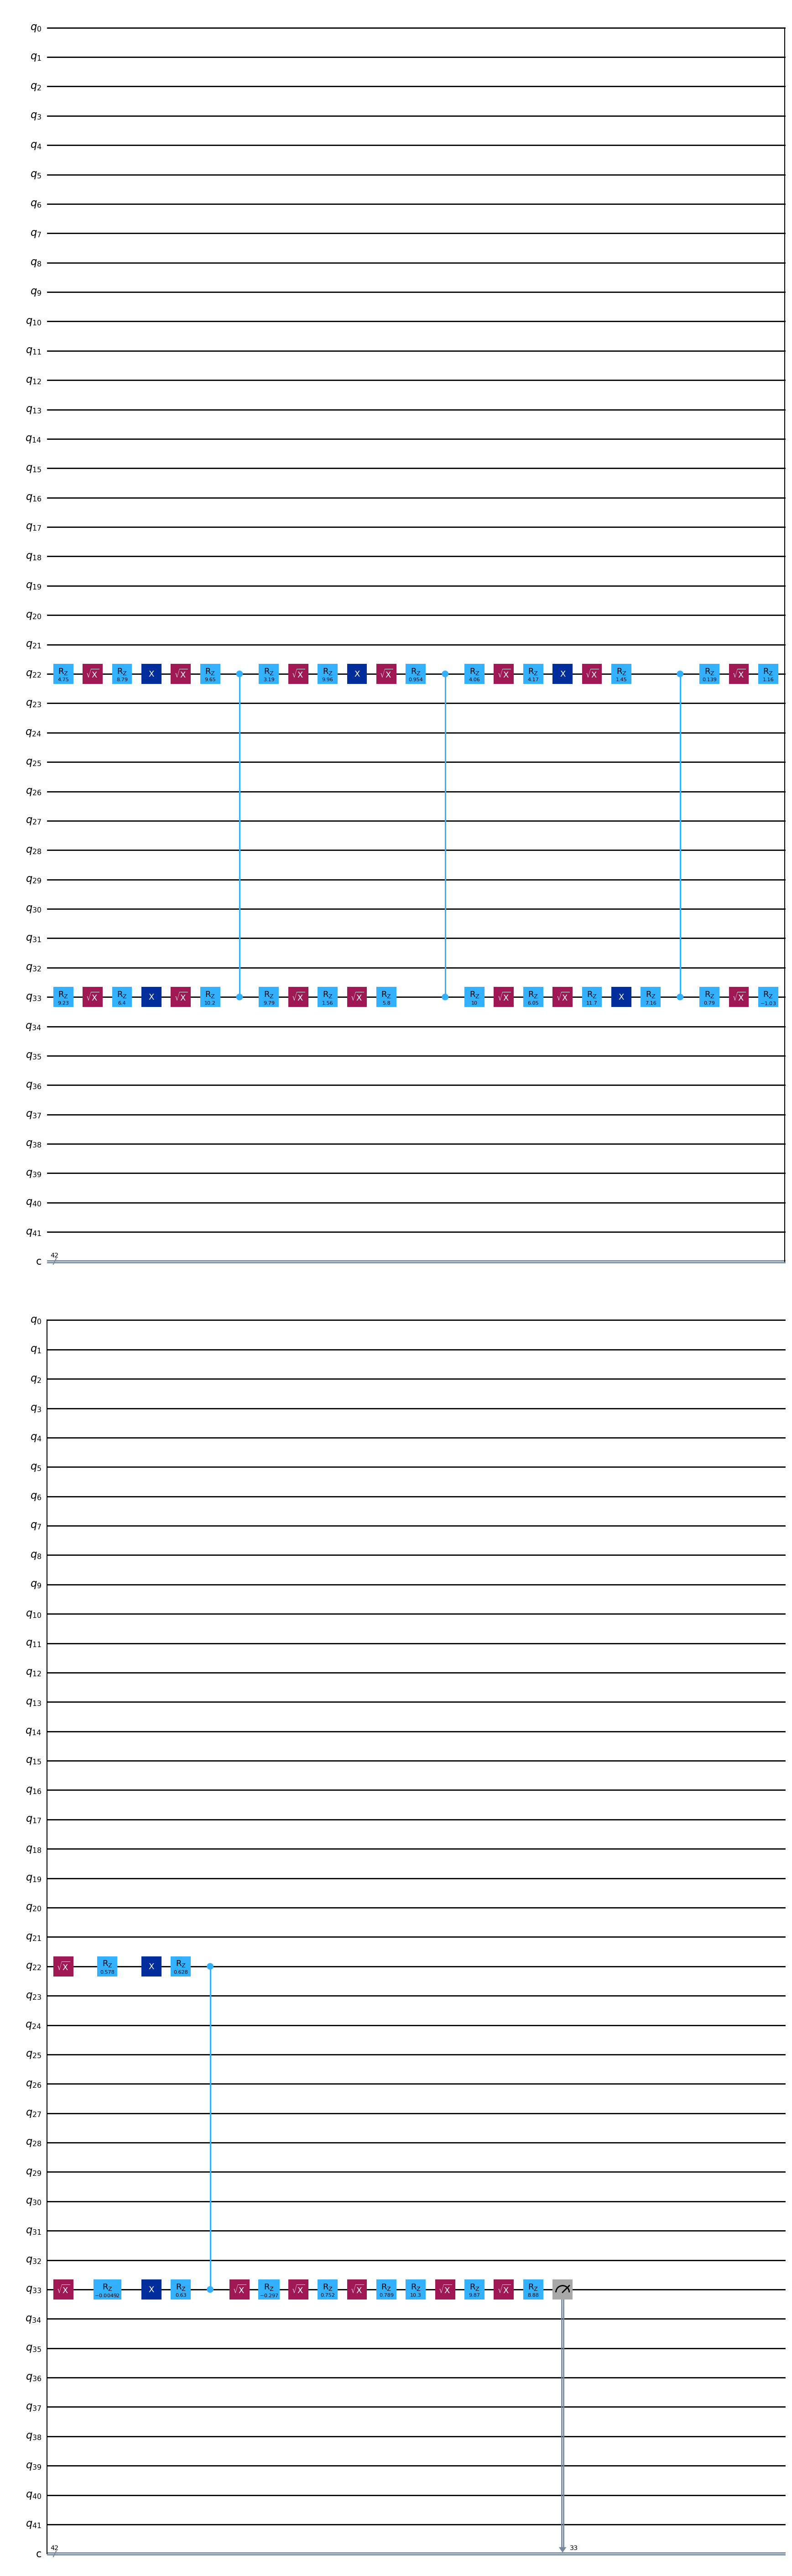

In [190]:
new_qc_2 = QuantumCircuit(42,42)
q_num_list = list_of_conn
current_gate_number = 0
for gate in new_qc.data:
    gg = gate[0]
    bb = gate[1]
    if len(bb) < 2:
        q1 = bb[0]._index
        if q1 in q_num_list:
            #print(q1)
            #print(new_qc.data[current_gate_number])
            new_qc_2.append(new_qc.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    else:
        q1 = bb[0]._index
        q2 = bb[1]._index
        if q1 in q_num_list or q2 in q_num_list:
            new_qc_2.append(new_qc.data[current_gate_number])
            gate_position.append(current_gate_number)
            
    current_gate_number = current_gate_number + 1

new_qc_2.draw('mpl')

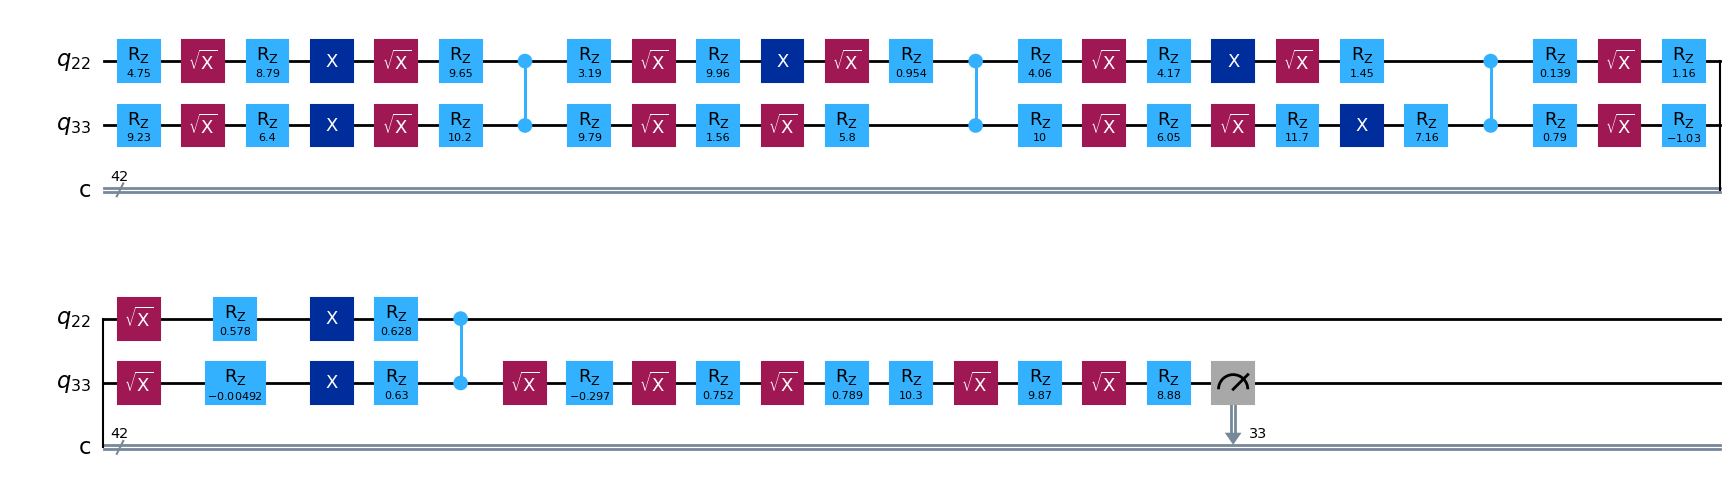

In [191]:
remove_unused_wires(new_qc_2)
new_qc_2.draw('mpl')

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: ogwIj64pVO8bNA7S, device: cpu, run status: PENDING, created on: 2024-10-25 16:52:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 42


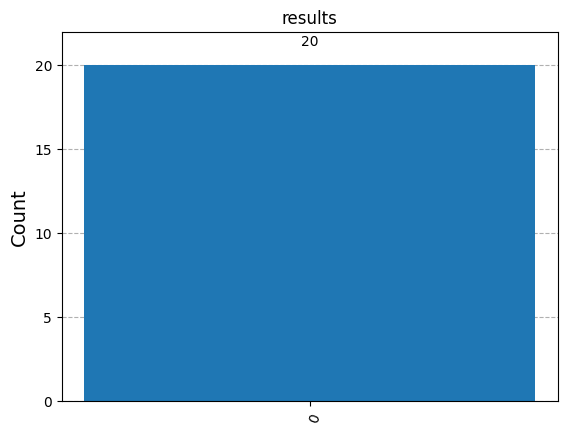

In [193]:
import bluequbit
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(new_qc_2, shots = 20)
counts = result.get_counts()
plot_histogram(counts, title = 'results')